# Import libraries necessary for this dissertation

In [1]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt1  # Standard datetime as dt1
from datetime import datetime as dt  # datetime.datetime as dt
import warnings
from matplotlib import pyplot
#from pandas import read_csv, set_option
from pandas import Series  # Only import Series, not datetime
from pandas.plotting import scatter_matrix, autocorrelation_plot  # Fixed path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from xgboost import XGBClassifier
import seaborn as sns


# Loading Data

In [2]:
df=pd.read_csv("Data/Processed Data/new_final_data_daily.csv")

In [3]:
df.columns

Index(['gold_price', 'Time', 'price', 'Estimated_transaction_volume',
       'market capitalisation', 'block_size', 'number_of_transaction',
       'Mempool_count', 'Mempool_size', 'Confirmed_Transaction',
       'google_trend', 'mining_difficulty', 'hash_rate_via_BTC',
       'Transaction_fee'],
      dtype='object')

# Data Cleaning

In [4]:
df['Time'] = pd.to_datetime(df['Time'])

In [5]:
df.head()

,gold_price,Time,price,Estimated_transaction_volume,market capitalisation,block_size,number_of_transaction,Mempool_count,Mempool_size,Confirmed_Transaction,google_trend,mining_difficulty,hash_rate_via_BTC,Transaction_fee
0,143.95,2020-01-02,6967.0,632780.0,1.304230e+11,0.794684,287215.0,1716.744792,6.258790e+05,287215.0,26,1.379878e+13,1.057932e+08,0.313629
1,145.86,2020-01-03,7343.1,936290.0,1.262808e+11,0.794684,287215.0,1716.744792,6.258790e+05,287215.0,29,1.379878e+13,1.057932e+08,0.313629
2,147.39,2020-01-06,7759.1,786750.0,1.333890e+11,0.794684,287215.0,4644.067708,2.169053e+06,287215.0,30,1.379878e+13,1.057932e+08,0.313629
3,147.97,2020-01-07,8155.7,1010000.0,1.405572e+11,0.794684,287215.0,4644.067708,2.169053e+06,287215.0,36,1.379878e+13,1.057932e+08,0.313629
4,146.86,2020-01-08,8059.6,1190000.0,1.477986e+11,1.063491,318019.0,8607.500000,4.346005e+06,318019.0,38,1.379878e+13,1.057932e+08,0.797560


In [6]:
df['gold_price']=df['gold_price'].fillna(method='ffill')

/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_11468/3134562986.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['gold_price']=df['gold_price'].fillna(method='ffill')


In [7]:
df.head()

,gold_price,Time,price,Estimated_transaction_volume,market capitalisation,block_size,number_of_transaction,Mempool_count,Mempool_size,Confirmed_Transaction,google_trend,mining_difficulty,hash_rate_via_BTC,Transaction_fee
0,143.95,2020-01-02,6967.0,632780.0,1.304230e+11,0.794684,287215.0,1716.744792,6.258790e+05,287215.0,26,1.379878e+13,1.057932e+08,0.313629
1,145.86,2020-01-03,7343.1,936290.0,1.262808e+11,0.794684,287215.0,1716.744792,6.258790e+05,287215.0,29,1.379878e+13,1.057932e+08,0.313629
2,147.39,2020-01-06,7759.1,786750.0,1.333890e+11,0.794684,287215.0,4644.067708,2.169053e+06,287215.0,30,1.379878e+13,1.057932e+08,0.313629
3,147.97,2020-01-07,8155.7,1010000.0,1.405572e+11,0.794684,287215.0,4644.067708,2.169053e+06,287215.0,36,1.379878e+13,1.057932e+08,0.313629
4,146.86,2020-01-08,8059.6,1190000.0,1.477986e+11,1.063491,318019.0,8607.500000,4.346005e+06,318019.0,38,1.379878e+13,1.057932e+08,0.797560


In [8]:
df.tail()

,gold_price,Time,price,Estimated_transaction_volume,market capitalisation,block_size,number_of_transaction,Mempool_count,Mempool_size,Confirmed_Transaction,google_trend,mining_difficulty,hash_rate_via_BTC,Transaction_fee
1359,303.65,2025-04-23,93697.7,90350.0,1.858588e+12,1.572216,418203.0,21466.583333,1.274924e+07,418203.0,53,1.232344e+14,8.993776e+08,2.523899
1360,308.07,2025-04-24,93980.3,66680.0,1.858660e+12,1.572216,418203.0,21466.583333,1.274924e+07,418203.0,43,1.232344e+14,8.237550e+08,2.523899
1361,304.73,2025-04-25,94676.9,92040.0,1.864298e+12,1.572216,418203.0,15415.234375,1.714119e+07,418203.0,42,1.232344e+14,8.237550e+08,2.523899
1362,309.07,2025-04-28,94995.0,73630.0,1.862772e+12,1.603343,441827.0,8253.588542,7.712119e+06,441827.0,41,1.232344e+14,8.296374e+08,1.104718
1363,306.06,2025-04-29,94269.8,59860.0,1.887067e+12,1.603343,441827.0,8253.588542,7.712119e+06,441827.0,40,1.232344e+14,8.296374e+08,1.104718


# Removing NAN value from data

In [9]:
df = df.dropna()

# Dependent Variable

In [10]:
y = np.where(df['price'].shift(-1) > df['price'],1,-1)

# Features included in the models

In [11]:
X=df.drop(['Time'], axis=1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X= scaler.fit_transform(X)

# Splitting the data as train and test

In [13]:
t=.8
t = int(t*len(df))
# Train dataset
X_train = X[:t]
y_train = y[:t]
# Test dataset
X_test = X[t:]
y_test = y[t:]

# Models

In [14]:

scoring = 'accuracy'
# Append the models to the models list
models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier(n_estimators=50)))
models.append(('XGBoost', XGBClassifier()))
models.append(('QDA' , QuadraticDiscriminantAnalysis()))


# Results

Original unique values in y: [-1  1]
Converted unique values in y: [0 1]

Model: LR
Accuracy Score: 0.4945054945054945
F1: 0.09210526315789473
Recall: 0.051094890510948905
Precision: 0.4666666666666667
Confusion Matrix:
Predicted    0  1
Actual           
0          128  8
1          130  7


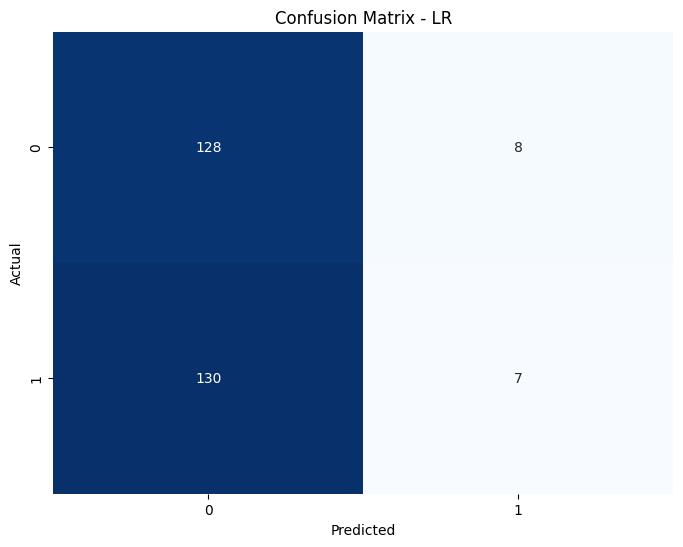

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.94      0.65       136
           1       0.47      0.05      0.09       137

    accuracy                           0.49       273
   macro avg       0.48      0.50      0.37       273
weighted avg       0.48      0.49      0.37       273


Model: LDA
Accuracy Score: 0.5128205128205128
F1: 0.3813953488372093
Recall: 0.29927007299270075
Precision: 0.5256410256410257
Confusion Matrix:
Predicted   0   1
Actual           
0          99  37
1          96  41


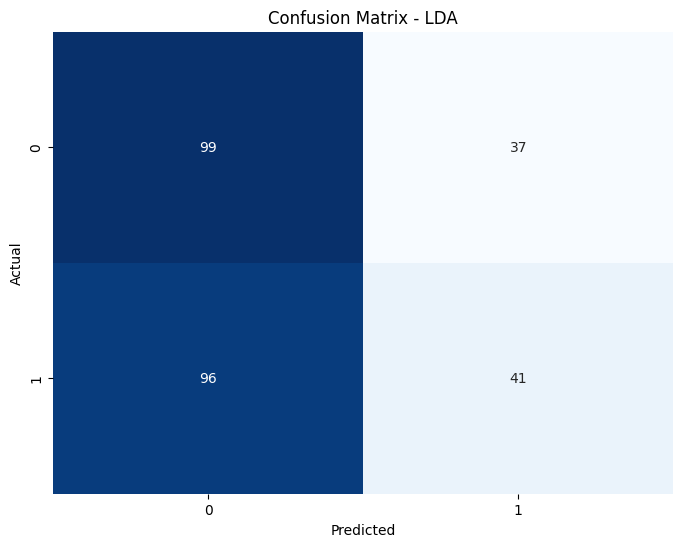

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.73      0.60       136
           1       0.53      0.30      0.38       137

    accuracy                           0.51       273
   macro avg       0.52      0.51      0.49       273
weighted avg       0.52      0.51      0.49       273


Model: KNN
Accuracy Score: 0.48717948717948717
F1: 0.38596491228070173
Recall: 0.32116788321167883
Precision: 0.4835164835164835
Confusion Matrix:
Predicted   0   1
Actual           
0          89  47
1          93  44


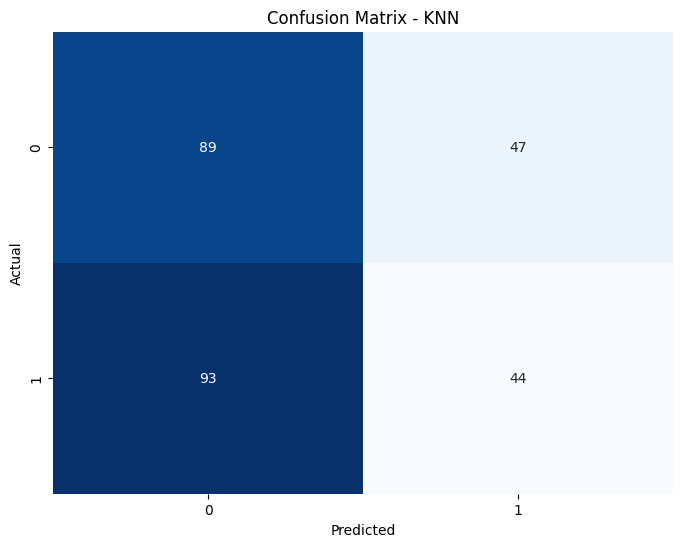

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.65      0.56       136
           1       0.48      0.32      0.39       137

    accuracy                           0.49       273
   macro avg       0.49      0.49      0.47       273
weighted avg       0.49      0.49      0.47       273


Model: CART
Accuracy Score: 0.4981684981684982
F1: 0.0
Recall: 0.0
Precision: 0.0
Confusion Matrix:
Predicted    0
Actual        
0          136
1          137


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


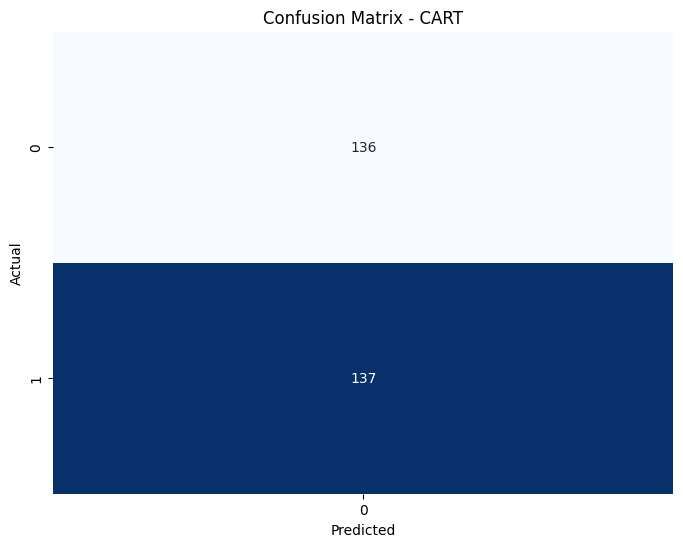

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       136
           1       0.00      0.00      0.00       137

    accuracy                           0.50       273
   macro avg       0.25      0.50      0.33       273
weighted avg       0.25      0.50      0.33       273


Model: NB
Accuracy Score: 0.5091575091575091
F1: 0.6699507389162561
Recall: 0.9927007299270073
Precision: 0.5055762081784386
Confusion Matrix:
Predicted  0    1
Actual           
0          3  133
1          1  136


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

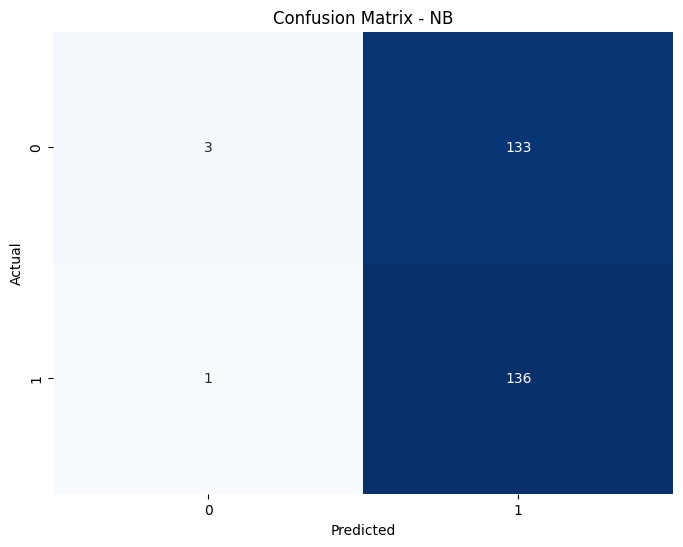

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.02      0.04       136
           1       0.51      0.99      0.67       137

    accuracy                           0.51       273
   macro avg       0.63      0.51      0.36       273
weighted avg       0.63      0.51      0.36       273


Model: QDA
Accuracy Score: 0.5018315018315018
F1: 0.31313131313131315
Recall: 0.22627737226277372
Precision: 0.5081967213114754
Confusion Matrix:
Predicted    0   1
Actual            
0          106  30
1          106  31


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


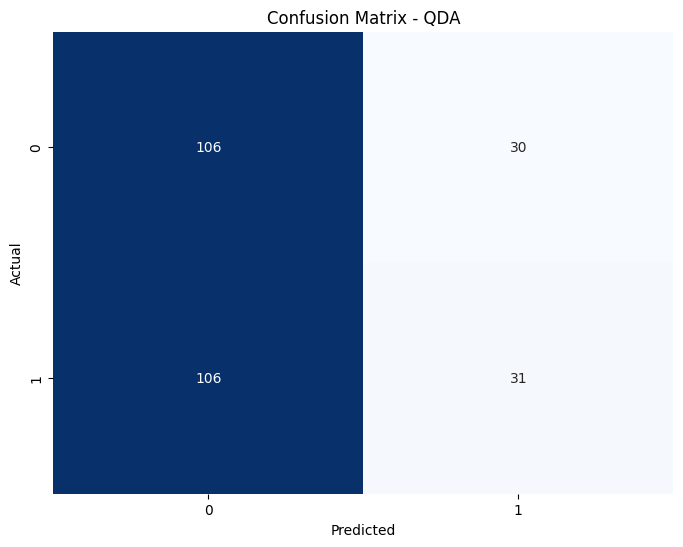

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.78      0.61       136
           1       0.51      0.23      0.31       137

    accuracy                           0.50       273
   macro avg       0.50      0.50      0.46       273
weighted avg       0.50      0.50      0.46       273


Model: SVM
Accuracy Score: 0.5018315018315018
F1: 0.48484848484848486
Recall: 0.46715328467153283
Precision: 0.5039370078740157
Confusion Matrix:
Predicted   0   1
Actual           
0          73  63
1          73  64


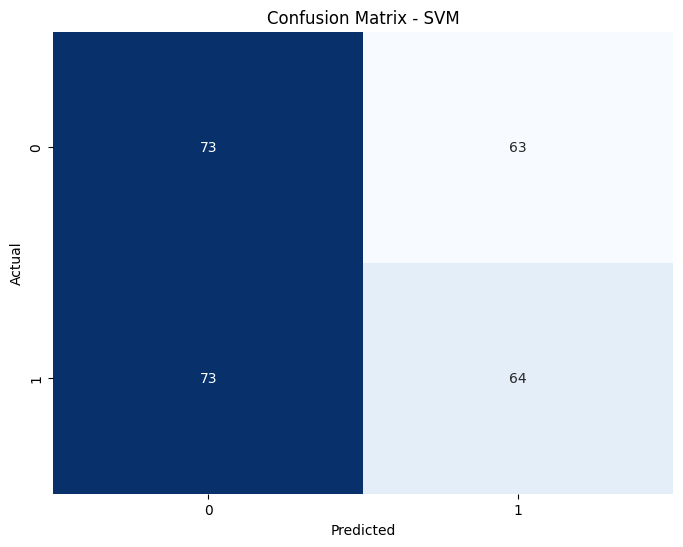

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52       136
           1       0.50      0.47      0.48       137

    accuracy                           0.50       273
   macro avg       0.50      0.50      0.50       273
weighted avg       0.50      0.50      0.50       273


Model: RF
Accuracy Score: 0.5054945054945055
F1: 0.18181818181818182
Recall: 0.10948905109489052
Precision: 0.5357142857142857
Confusion Matrix:
Predicted    0   1
Actual            
0          123  13
1          122  15


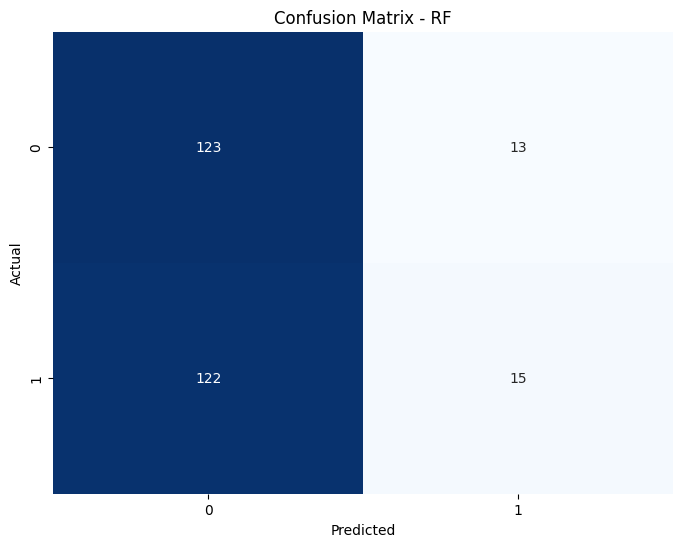

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.90      0.65       136
           1       0.54      0.11      0.18       137

    accuracy                           0.51       273
   macro avg       0.52      0.51      0.41       273
weighted avg       0.52      0.51      0.41       273


Model: XGB
Accuracy Score: 0.5201465201465202
F1: 0.38497652582159625
Recall: 0.29927007299270075
Precision: 0.5394736842105263
Confusion Matrix:
Predicted    0   1
Actual            
0          101  35
1           96  41


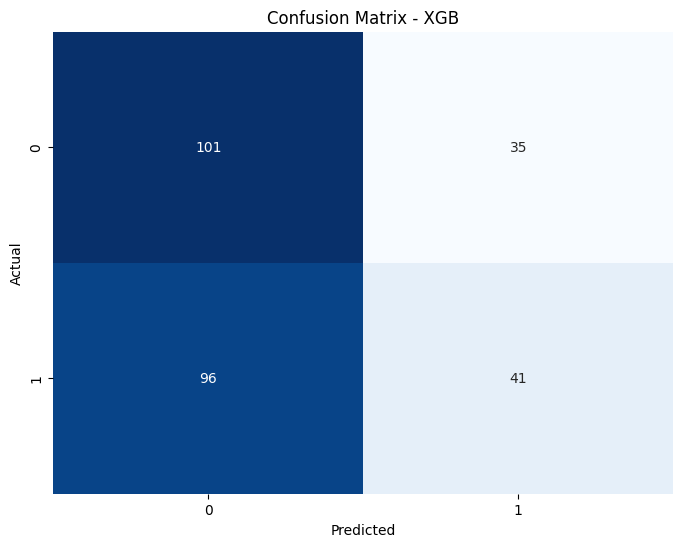

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.74      0.61       136
           1       0.54      0.30      0.38       137

    accuracy                           0.52       273
   macro avg       0.53      0.52      0.50       273
weighted avg       0.53      0.52      0.50       273


Model: ADA
Accuracy Score: 0.5238095238095238
F1: 0.13333333333333333
Recall: 0.072992700729927
Precision: 0.7692307692307693
Confusion Matrix:
Predicted    0   1
Actual            
0          133   3
1          127  10


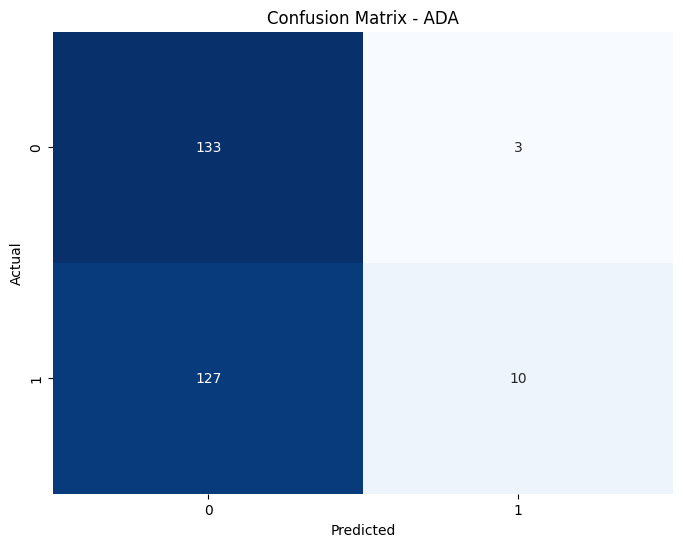

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.98      0.67       136
           1       0.77      0.07      0.13       137

    accuracy                           0.52       273
   macro avg       0.64      0.53      0.40       273
weighted avg       0.64      0.52      0.40       273


Model: GB
Accuracy Score: 0.5128205128205128
F1: 0.06993006993006994
Recall: 0.0364963503649635
Precision: 0.8333333333333334
Confusion Matrix:
Predicted    0  1
Actual           
0          135  1
1          132  5


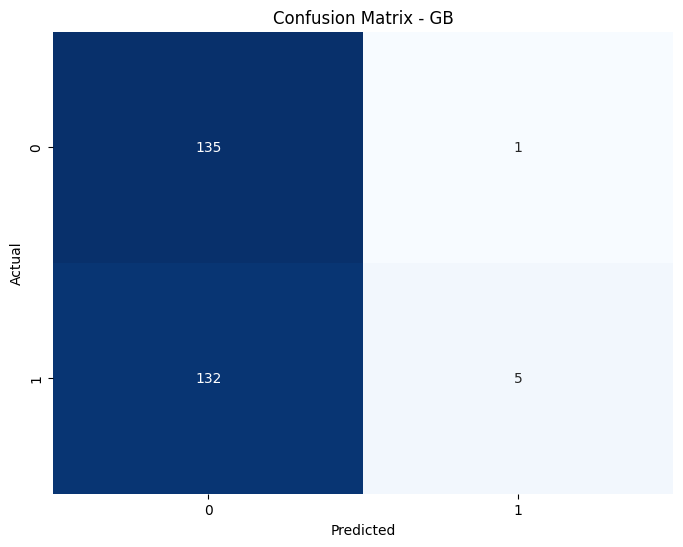

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.99      0.67       136
           1       0.83      0.04      0.07       137

    accuracy                           0.51       273
   macro avg       0.67      0.51      0.37       273
weighted avg       0.67      0.51      0.37       273


Model: ET
Accuracy Score: 0.5128205128205128
F1: 0.19393939393939394
Recall: 0.11678832116788321
Precision: 0.5714285714285714
Confusion Matrix:
Predicted    0   1
Actual            
0          124  12
1          121  16


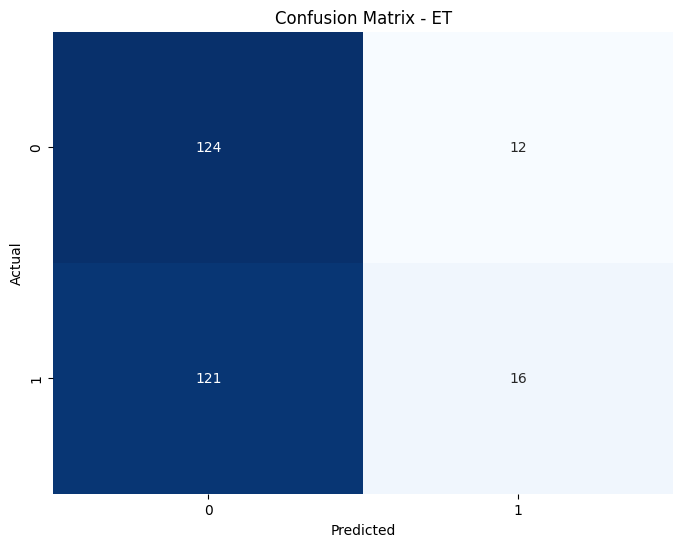

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.91      0.65       136
           1       0.57      0.12      0.19       137

    accuracy                           0.51       273
   macro avg       0.54      0.51      0.42       273
weighted avg       0.54      0.51      0.42       273


Model: CAT
Accuracy Score: 0.5018315018315018
F1: 0.17073170731707318
Recall: 0.10218978102189781
Precision: 0.5185185185185185
Confusion Matrix:
Predicted    0   1
Actual            
0          123  13
1          123  14


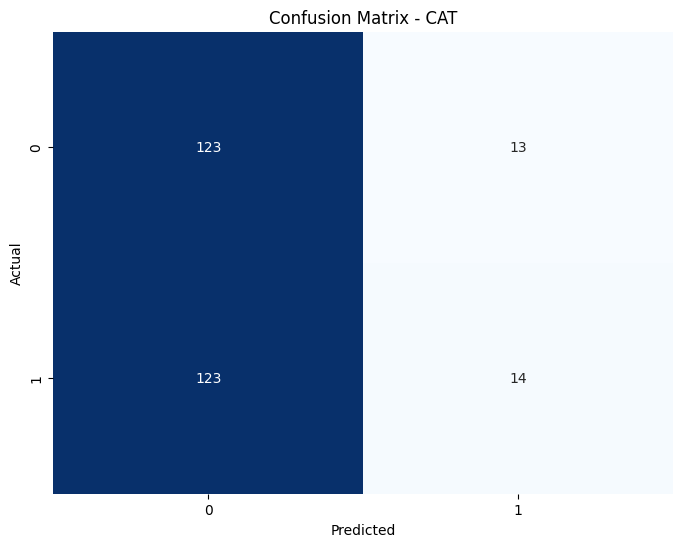

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.90      0.64       136
           1       0.52      0.10      0.17       137

    accuracy                           0.50       273
   macro avg       0.51      0.50      0.41       273
weighted avg       0.51      0.50      0.41       273


Model Comparison:
   Model  Accuracy        F1    Recall  Precision
0    ADA  0.523810  0.133333  0.072993   0.769231
1    XGB  0.520147  0.384977  0.299270   0.539474
2    LDA  0.512821  0.381395  0.299270   0.525641
3     GB  0.512821  0.069930  0.036496   0.833333
4     ET  0.512821  0.193939  0.116788   0.571429
5     NB  0.509158  0.669951  0.992701   0.505576
6     RF  0.505495  0.181818  0.109489   0.535714
7    QDA  0.501832  0.313131  0.226277   0.508197
8    SVM  0.501832  0.484848  0.467153   0.503937
9    CAT  0.501832  0.170732  0.102190   0.518519
10  CART  0.498168  0.000000  0.000000   0.000000
11    LR  0.494505  0.092105  0

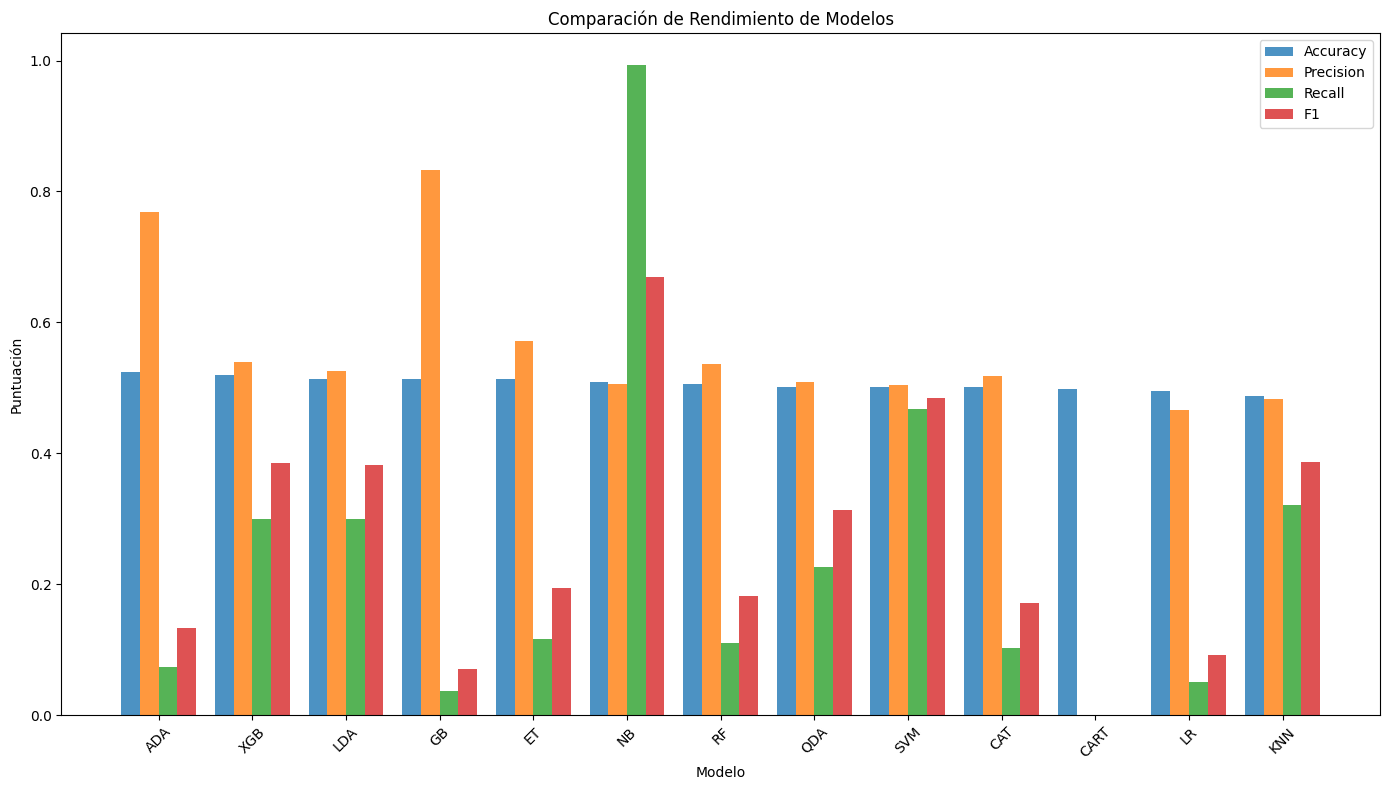

In [15]:
# Import CatBoost at the top with your other imports
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Define models to include in the comparison
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ET', ExtraTreesClassifier()))
# Add CatBoost classifier
models.append(('CAT', CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0)))

# Convert target labels from [-1, 1] to [0, 1]
print("Original unique values in y:", np.unique(y))
if -1 in np.unique(y):
    y = (y + 1) // 2
    y_train = (y_train + 1) // 2
    y_test = (y_test + 1) // 2
    print("Converted unique values in y:", np.unique(y))

# Collect metrics for comparison
all_metrics = []

# Train and evaluate each model
for name, model in models:
    # Train the model
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate metrics
    accu_score = accuracy_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    Recall = recall_score(y_test, y_pred)
    Precision = precision_score(y_test, y_pred)
    
    # Create confusion matrix
    conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False)
    
    # Store metrics for comparison
    all_metrics.append({
        'Model': name,
        'Accuracy': accu_score,
        'F1': F1_score,
        'Recall': Recall,
        'Precision': Precision
    })
    
    # Print individual model results
    print("\n" + "="*50)
    print("Model: " + name)
    print('Accuracy Score:', accu_score)
    print('F1: ' + str(F1_score))
    print('Recall: ' + str(Recall))
    print('Precision: ' + str(Precision))
    print('Confusion Matrix:')
    print(conf_matrix)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print("="*50)

# Create comparison DataFrame
metrics_df = pd.DataFrame(all_metrics)
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display comparison table
print("\nModel Comparison:")
print(metrics_df)

# Plot model comparisons
plt.figure(figsize=(14, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
bar_width = 0.2
opacity = 0.8

for i, metric in enumerate(metrics):
    plt.bar(
        np.arange(len(metrics_df)) + i*bar_width, 
        metrics_df[metric], 
        bar_width, 
        alpha=opacity, 
        label=metric
    )

plt.xlabel('Modelo')
plt.ylabel('Puntuación')
plt.title('Comparación de Rendimiento de Modelos')
plt.xticks(np.arange(len(metrics_df)) + bar_width*1.5, metrics_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
   
    